<a href="https://colab.research.google.com/github/debora28/projetoPi_2020-1/blob/master/Data_Science_Estatistica_Descritiva_Visualizacao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aula Prática - Data Science**

Estatística Descritiva e Visualização de dados

**Professor:** Geraldo Gomes

In [ ]:
#Código base para upload de arquivos para o Google Colab
from google.colab import files
uploaded = files.upload()

Saving cardio.csv to cardio (2).csv


In [ ]:
#Código base para descompactar e exibir arquivo recebido
for fn in uploaded.keys():
  print('Arquivo enviado pelo usuario: "{name}", com comprimento de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Arquivo enviado pelo usuario: "cardio.csv", com comprimento de 7966 bytes


In [ ]:
#importando bibliotecas
#Numpy: Oferece funções essênciais para álgebra linear, manipulação de imagens e cálculos com arrays
#Pandas: Utilizada para a preparação e operação dos dados em alta performance. Trabalha com duas estruturas principais: Series (Array unidimensional) e Dataframes (bidimensional);
import numpy as np
import pandas as pd

In [ ]:
#Carregando os dados do CSV em um Dataframe Pandas
mydata = pd.read_csv('cardio.csv')
#Visualizando as 5 primeiras linhas do Dataframe
mydata.head()

,Produto,Idade,Sexo,Educacao,EstadoCivil,Uso,CondicionamentoFisico,Renda,Milhas
0,TM195,18,Masculino,14,Solteiro,3,4,29562,112
1,TM195,19,Masculino,15,Solteiro,2,3,31836,75
2,TM195,19,Feminino,14,Casado,4,3,30699,66
3,TM195,19,Masculino,12,Solteiro,3,3,32973,85
4,TM195,20,Masculino,13,Casado,4,2,35247,47


In [ ]:
#Obtendo estatística descritiva dos dados carregados
mydata.describe(include="all")

,Produto,Idade,Sexo,Educacao,EstadoCivil,Uso,CondicionamentoFisico,Renda,Milhas
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Masculino,NaN,Casado,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
#Obtendo informações sobre os tipos dos dados e verificando a existencia de dados nulos
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Produto                180 non-null    object
 1   Idade                  180 non-null    int64 
 2   Sexo                   180 non-null    object
 3   Educacao               180 non-null    int64 
 4   EstadoCivil            180 non-null    object
 5   Uso                    180 non-null    int64 
 6   CondicionamentoFisico  180 non-null    int64 
 7   Renda                  180 non-null    int64 
 8   Milhas                 180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
#Obtendo moda, mediana, média e desvio padrão da renda tomando como referência o produto
agrupamento = mydata.groupby('Produto')['Renda'].agg([lambda x: pd.Series.mode(x).iat[0], pd.Series.median, pd.Series.mean, pd.Series.std])

In [ ]:
#renomeando as colunas
agrupamento.rename(columns = {'<lambda_0>':'moda','median':'mediana','mean':'media','std':'desvio_padrao'},inplace=True)

In [ ]:
#reordenando o df
agrupamento.sort_values(by='Produto', ascending=False,inplace=True)

In [ ]:
#exibindo dataframe de agrupamento
agrupamento

,moda,mediana,media,desvio_padrao
Produto,,,,
TM798,90886,76568.5,75441.575,18505.836720
TM498,45480,49459.5,48973.650,8653.989388
TM195,46617,46617.0,46418.025,9075.783190


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89c38e5c18>,
      dtype=object)

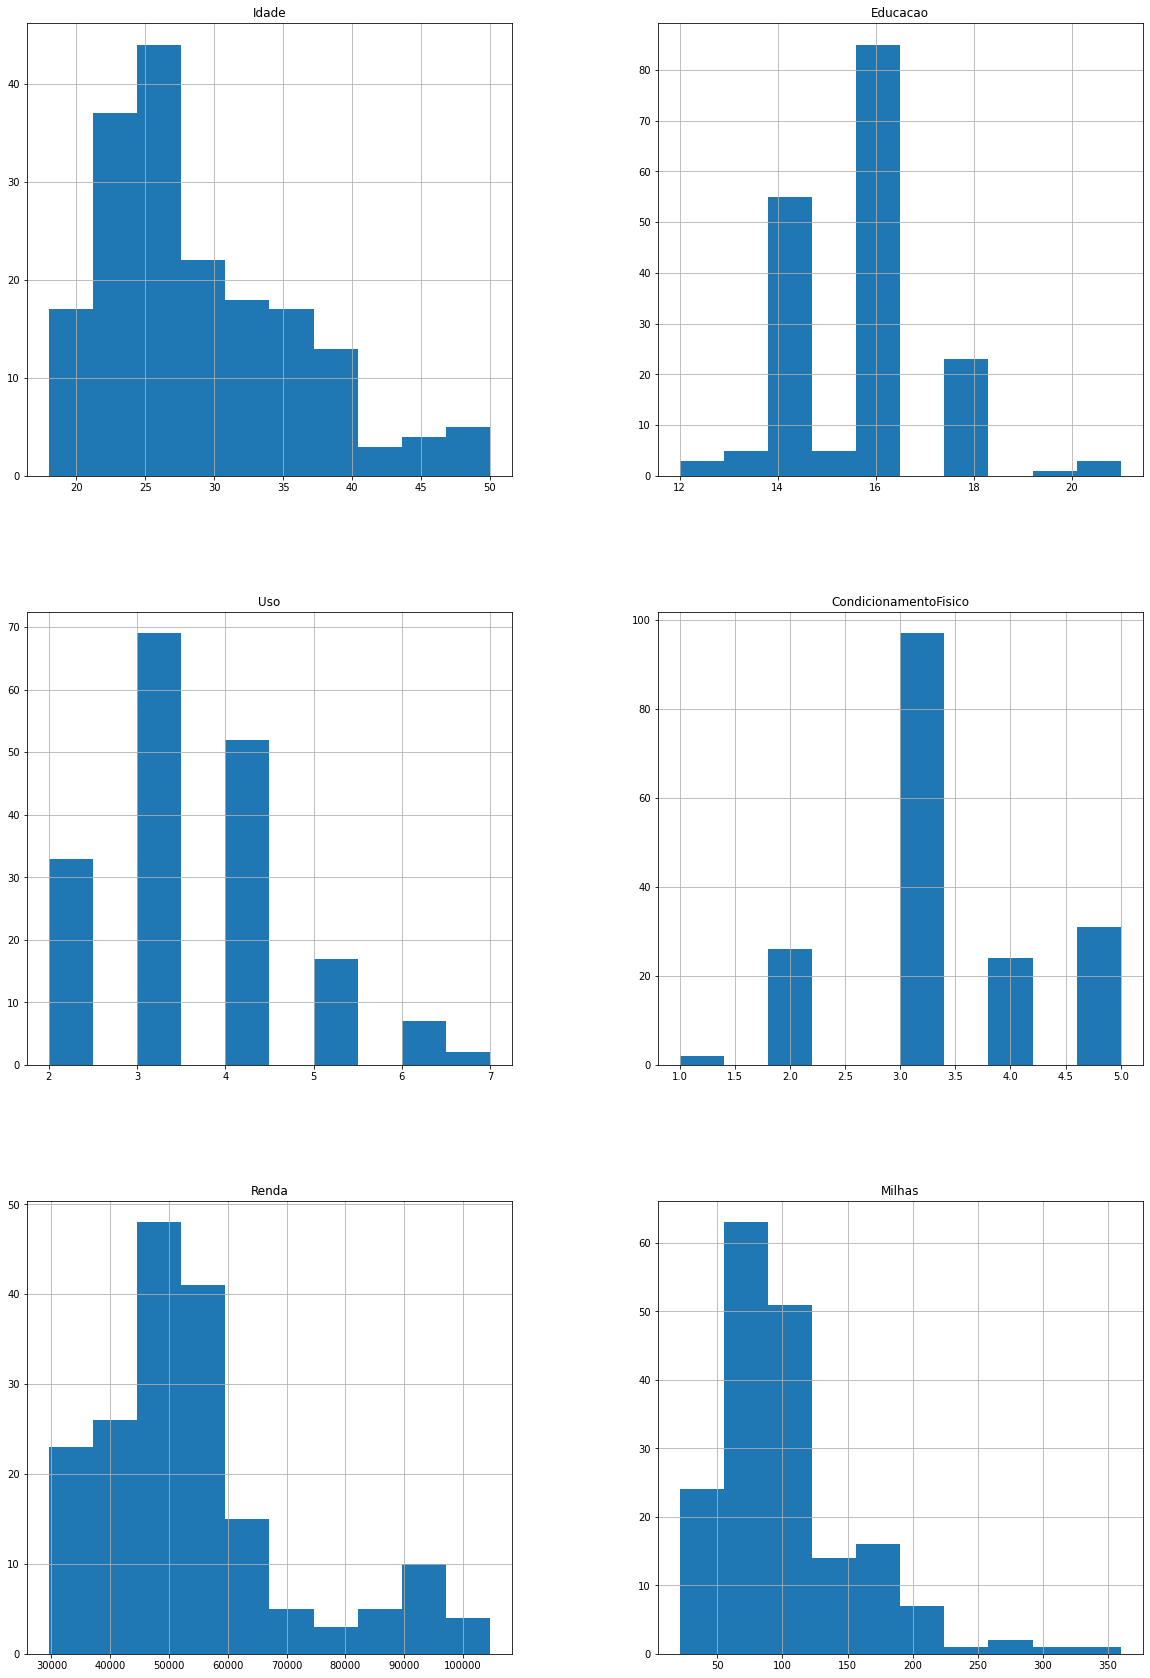

In [ ]:
#Importando biblioteca matplotlib para visualização dos dados
import matplotlib.pyplot as plt
%matplotlib inline

#Gerando histograma de todas as dimensões contínuas
mydata.hist(figsize=(20,30))

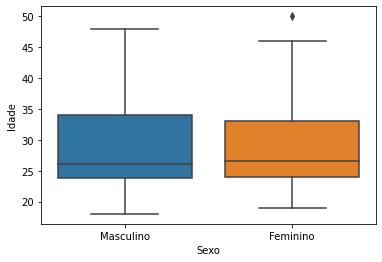

In [ ]:
#importando a biblioteca seaborn para a geração de gráficos mais sofisticados
import seaborn as sns

#gerando um boxplot 
sns.boxplot(x="Sexo", y="Idade", data=mydata)

**Como ler um boxplot:**

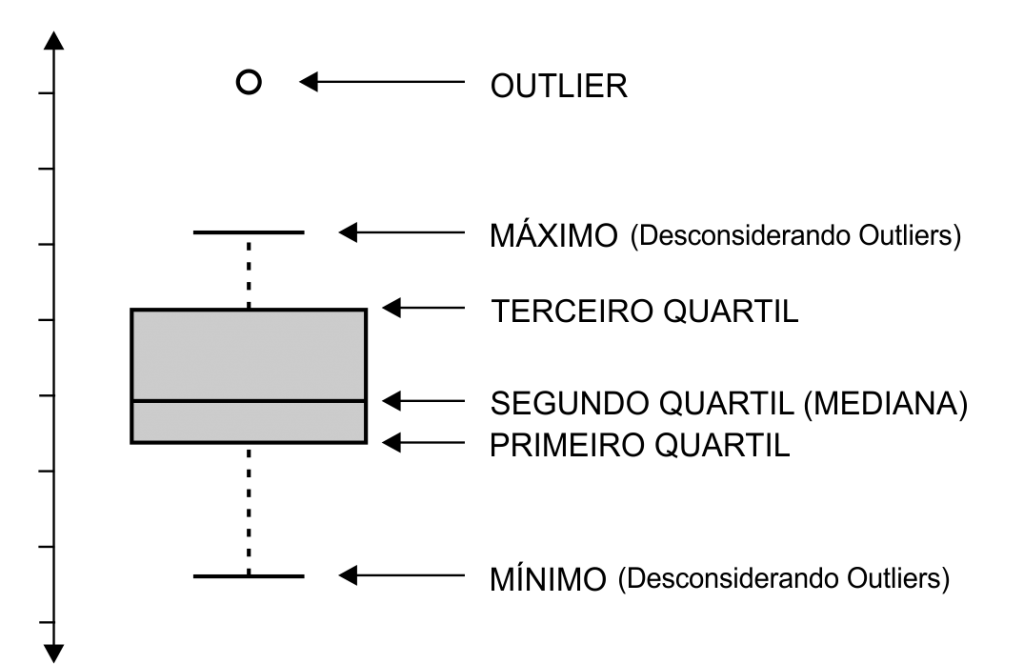

In [ ]:
#cruzando dados de tabelas
pd.crosstab(mydata['Produto'],mydata['Sexo'] )

Sexo,Feminino,Masculino
Produto,,
TM195,40,40
TM498,29,31
TM798,7,33


In [ ]:
#cruzando dados de tabelas
pd.crosstab(mydata['Produto'],mydata['EstadoCivil'] )

EstadoCivil,Casado,Solteiro
Produto,,
TM195,48,32
TM498,36,24
TM798,23,17


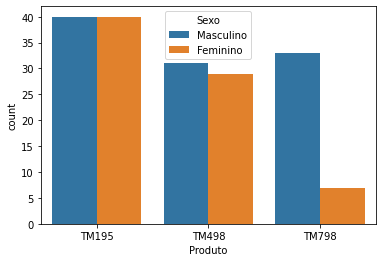

In [ ]:
#Gerando um gráfico de barras cruzando as dimensões de Produto e Sexo
sns.countplot(x="Produto", hue="Sexo", data=mydata)

In [ ]:
#Utilizando os benefícios do dataframe para criar uma tabela estilo planilha
pd.pivot_table(mydata, index=['Produto', 'Sexo'],
                     columns=[ 'EstadoCivil'], aggfunc=len)

CondicionamentoFisico           ...    Uso         
EstadoCivil                      Casado Solteiro  ... Casado Solteiro
Produto Sexo                                      ...                
TM195   Feminino                     27       13  ...     27       13
        Masculino                    21       19  ...     21       19
TM498   Feminino                     15       14  ...     15       14
        Masculino                    21       10  ...     21       10
TM798   Feminino                      4        3  ...      4        3
        Masculino                    19       14  ...     19       14

[6 rows x 12 columns]

In [ ]:
#Utilizando os benefícios do dataframe para criar uma tabela estilo planilha
pd.pivot_table(mydata,'Renda', index=['Produto', 'Sexo'],
                     columns=[ 'EstadoCivil'])

EstadoCivil              Casado      Solteiro
Produto Sexo                                 
TM195   Feminino   46153.777778  45742.384615
        Masculino  50028.000000  43265.842105
TM498   Feminino   49724.800000  48920.357143
        Masculino  49378.285714  47071.800000
TM798   Feminino   84972.250000  58516.000000
        Masculino  81431.368421  68216.428571

In [ ]:
#Utilizando os benefícios do dataframe para criar uma tabela estilo planilha
pd.pivot_table(mydata,'Milhas', index=['Produto', 'Sexo'],
                     columns=[ 'EstadoCivil'])

EstadoCivil            Casado    Solteiro
Produto Sexo                             
TM195   Feminino    74.925926   78.846154
        Masculino   80.190476   99.526316
TM498   Feminino    94.000000   80.214286
        Masculino   87.238095   91.100000
TM798   Feminino   215.000000  133.333333
        Masculino  176.315789  147.571429

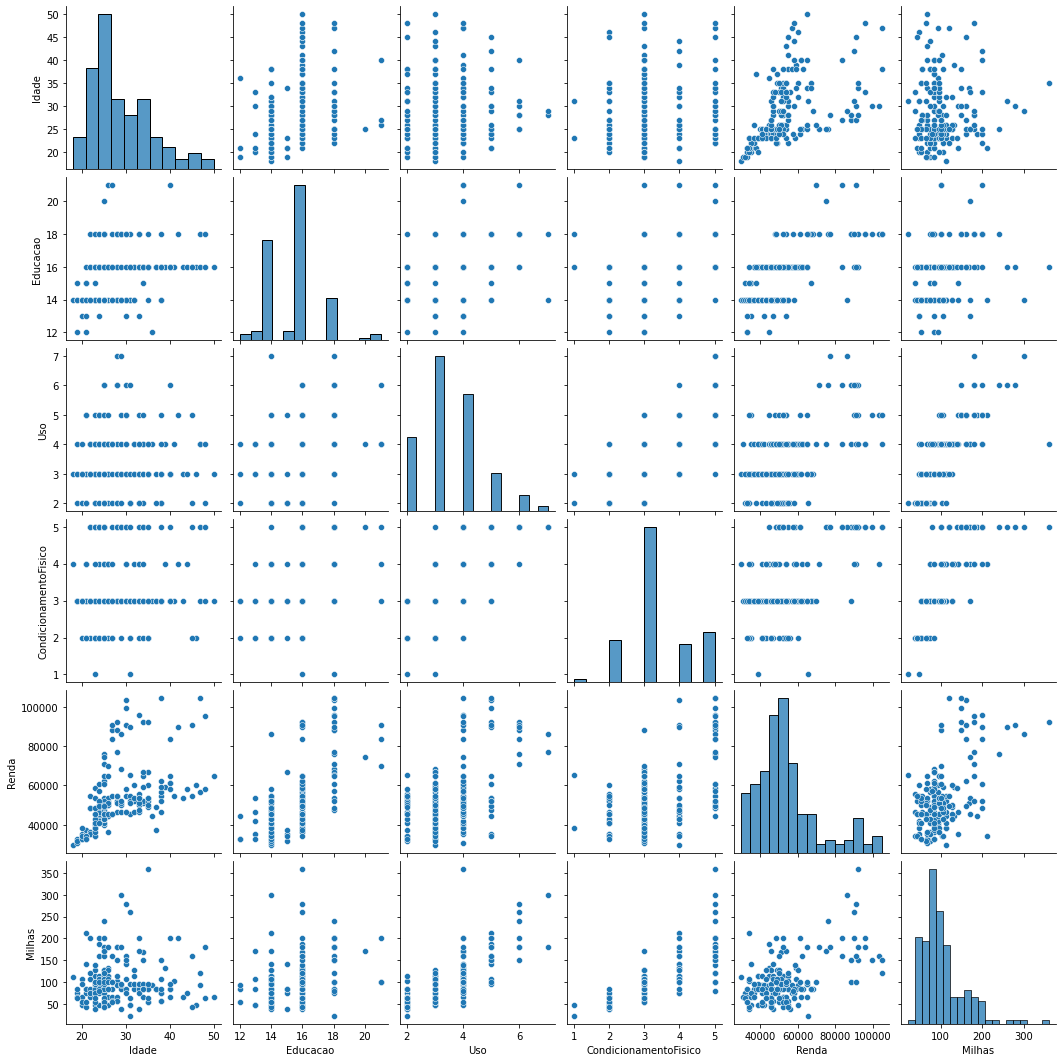

In [ ]:
#Utilizando o seaborn para gerar gráficos cruzando todas as dimensões contínuas 
sns.pairplot(mydata)

In [ ]:
#Calculando o Desvio Padrão
mydata['Idade'].std()

6.943498135399795

In [ ]:
#Calculando a média
mydata['Idade'].mean()

28.788888888888888

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


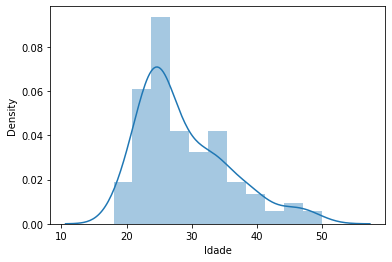

In [ ]:
#utilizando o seaborn para gerar um gráfico padrão com uma estimativa de densidade do kernel e um histograma
sns.distplot(mydata['Idade'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f31ae8a40f0>,
      dtype=object)

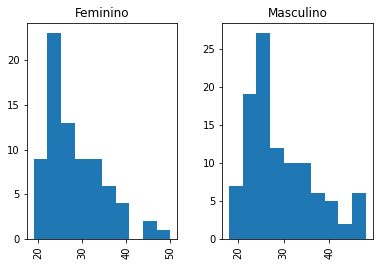

In [ ]:
#Gerando histogramas com dimensões contínuas e categoricas 
mydata.hist(by='Sexo',column = 'Idade')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f31ae8970b8>,
      dtype=object)

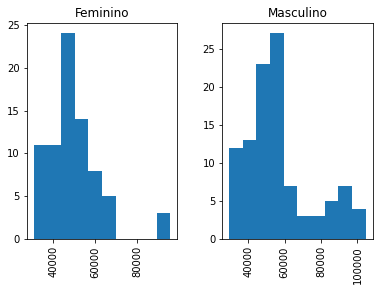

In [ ]:
#Gerando histogramas com dimensões contínuas e categoricas 
mydata.hist(by='Sexo',column = 'Renda')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f31acd11eb8>,
      dtype=object)

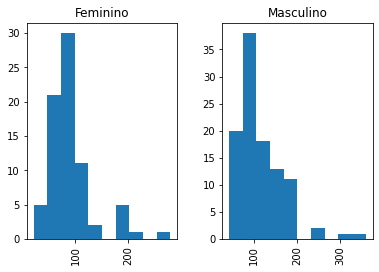

In [ ]:
#Gerando histogramas com dimensões contínuas e categoricas 
mydata.hist(by='Sexo',column = 'Milhas')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89b10b0fd0>,
      dtype=object)

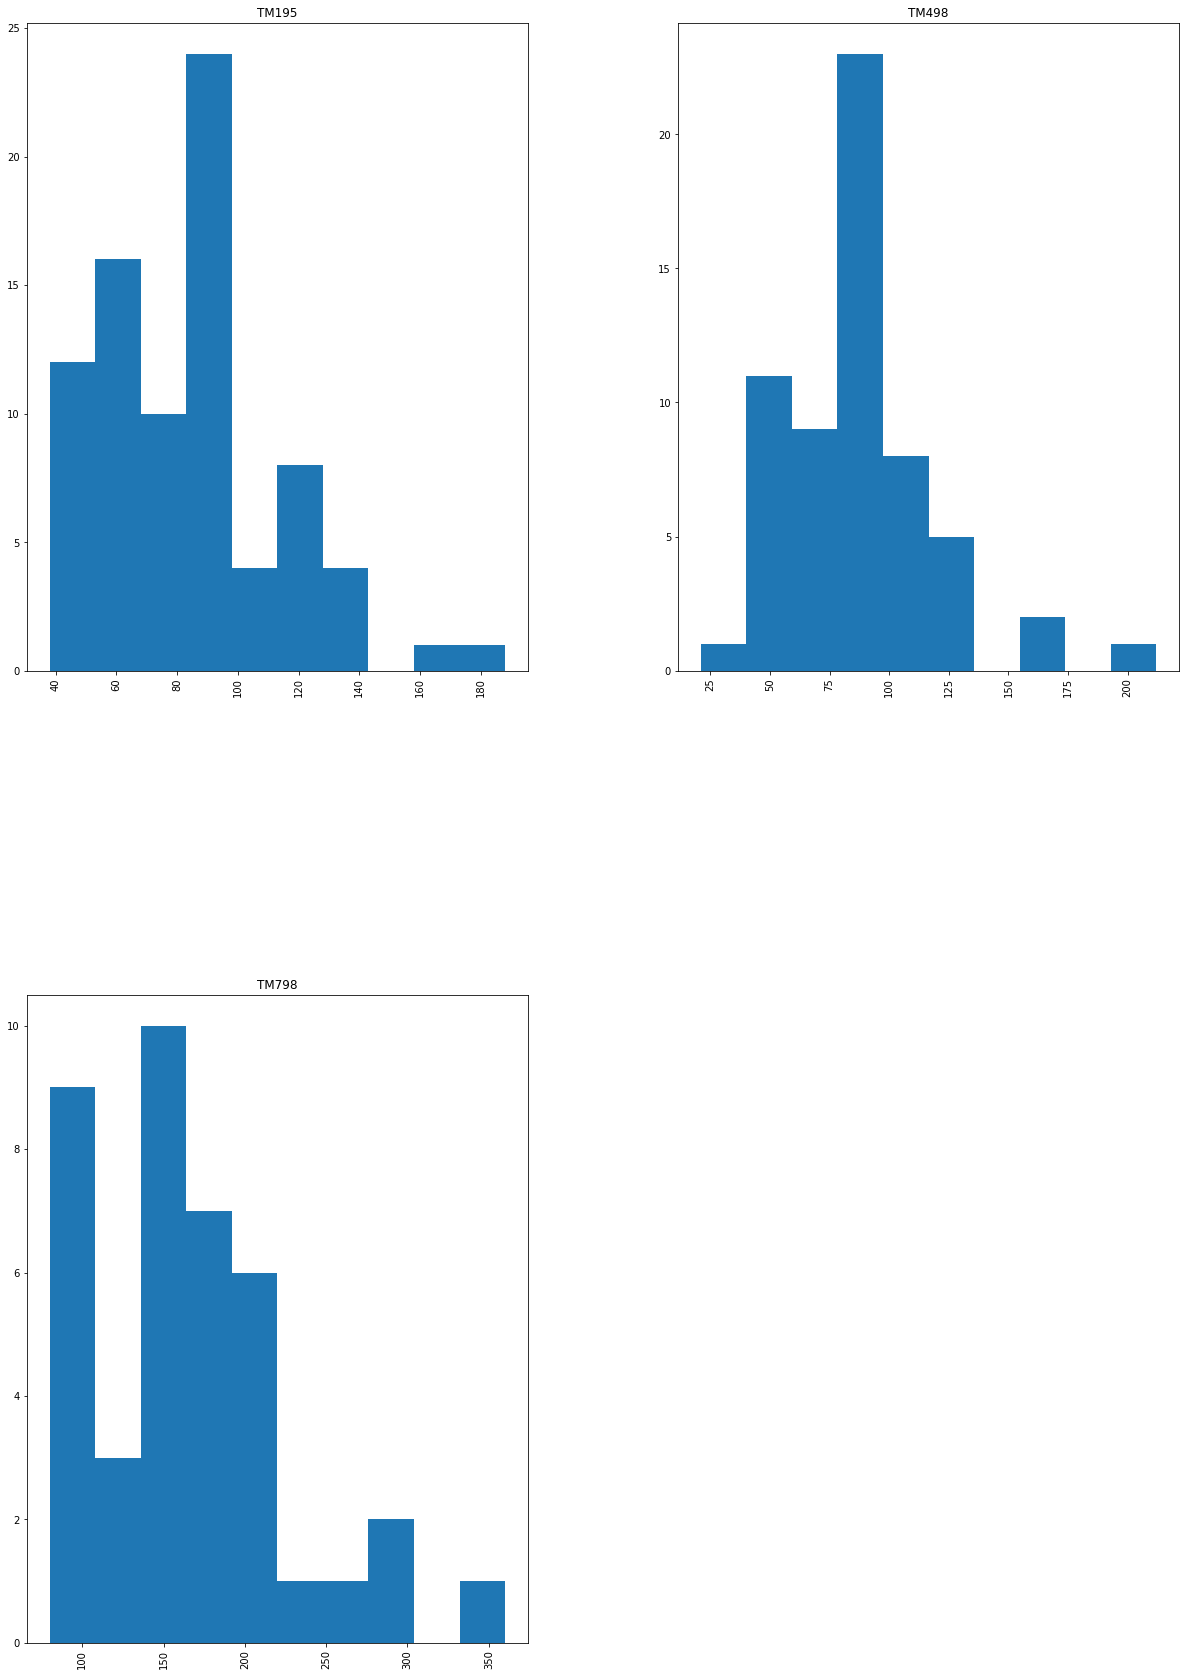

In [ ]:
#Gerando histogramas com dimensões contínuas e categoricas 
#Manipulando o tamanho do Gráfico gerado
mydata.hist(by='Produto',column = 'Milhas', figsize=(20,30))

In [ ]:
# Calculando Correlação
# Quanto mais próximo de 1: Diretamente relacionado
# Quanto mais próximo de -1: Inversamente relacionado
corr = mydata.corr()
corr

,Idade,Educacao,Uso,CondicionamentoFisico,Renda,Milhas
Idade,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Educacao,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Uso,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
CondicionamentoFisico,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Renda,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Milhas,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


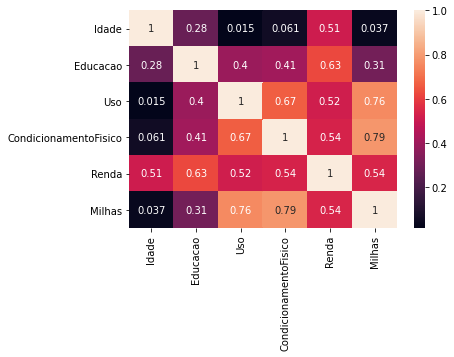

In [ ]:
# Gerando uma matriz de correlação
# Perceba que quanto mais claro: Diretamente proporcional
# Perceba que quanto mais escuro: Inversamente proporcional
sns.heatmap(corr, annot=True)

In [ ]:
# Simple Linear Regression
#Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = mydata['Milhas']
x = mydata[['Uso','CondicionamentoFisico']]

# Train the model using the training sets
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regr.coef_

array([20.21486334, 27.20649954])

In [ ]:
regr.intercept_

-56.74288178464862

In [ ]:
# MilhasPredicted = -56.74 + 20.21*Uso + 27.20*CondicionamentoFisico